In [46]:
import pandas as pd
import numpy as np
import glob
import numpy as np
import shutil
import sys
import os
import pylab as p
from scipy import integrate, optimize
import pandas as pd
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dx/dt = (a - b * y ) * x -- prey

dy/dt = (-c + g * x) * y -- predator

но жертвы не умирают своей смертью, это странно

=>

dx/dt = (b_pr - k_y * y - h(x)) * x

dy/dt = (-d_pd +  h(x) * x) * y

* A linear death rate for predators is common
* If
predator density is not so large that they interfere with each other
while searching for prey, then one often assumes that the death rate
due to predators is linear in predator density.
* Also, it is common to
assume that predator reproduction rate is proportional to the predator
kill rate.

*  h(x) -- сколько убьет хищник жертв
* h = N / T -- в среднем за T лет он убивает N жертв

* s -- площадь которую обходит зверь за единицу времени
* t - время на обработку жертвы

=>

T - N * t -- время потраченное на поиск

s * (T - N * t) -- покрытая площадь во время поиска

x * s * (T - N * t) -- встретит жертв

* N = x * s * ( T - N * t)
* N / T = x * s / (x * s * t + 1)
* s, t - const

=>

dx/dt = (b_pr - k_y * y - h(x)) * x

dy/dt = (-d_pd +  h(x) * x) * y


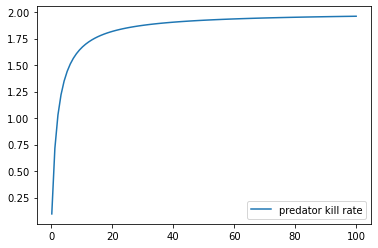

In [53]:
s = 1
tau = 0.5
x_space = np.linspace(0.1, 100, 100)
y_space = np.zeros(x_space.shape)

def h(x):
    return x * s / ( x * s * tau + 1)

for idx, x_v in enumerate(x_space):
    y_space[idx] = h(x_v)

plt.plot(x_space, y_space, label="predator kill rate")
plt.legend()
plt.show()

x' = a * x - b * x - h(x) * y

y' = - c * y + d * h(x) * y

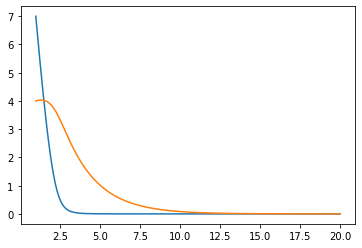

In [65]:
t = np.linspace(1, 20, 1000) # time
X0 = np.array([7, 4]) # prey predator

def solve(func, args):
    return integrate.odeint(func, X0, t, args=args)

def h(x):
    return x * s / ( x * s * tau + 1)

def fun(X, t, a, b, c, d):
    x, y = X
    dxdt = a * x - b * x - h(x) * y
    dydt = -c * y + d * y  * h(x)
    return dxdt, dydt

res = integrate.odeint(fun, X0, t, args=tuple([0.7, 0.71, 0.5, 0.35]))
res

plt.plot(t, res)
plt.show()


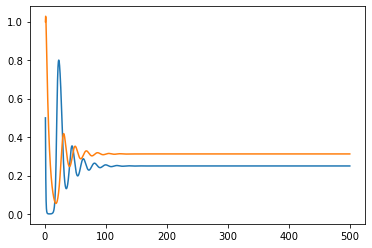

In [82]:
t = np.linspace(1, 500, 10000) # time
X0 = np.array([0.5, 1]) # prey predator

def solve(func, args):
    return integrate.odeint(func, X0, t, args=args)

def h(x, a):
    return x * a / ( x + 1)

def fun(X, t, a, b, d):
    x, y = X
    dxdt = b * x - b * x * x - h(x, a) * y
    dydt = -d * y + y  * h(x, 1)
    return dxdt, dydt

res = integrate.odeint(fun, X0, t, args=tuple([3, 1, 0.2]))
res

plt.plot(t, res)
plt.show()

In [92]:
frame = pd.read_csv("/Users/nduginets/PycharmProjects/master-diploma/Leigh1968_harelynx.csv")
frame
frame.columns

Index(['year', 'hare', 'lynx'], dtype='object')

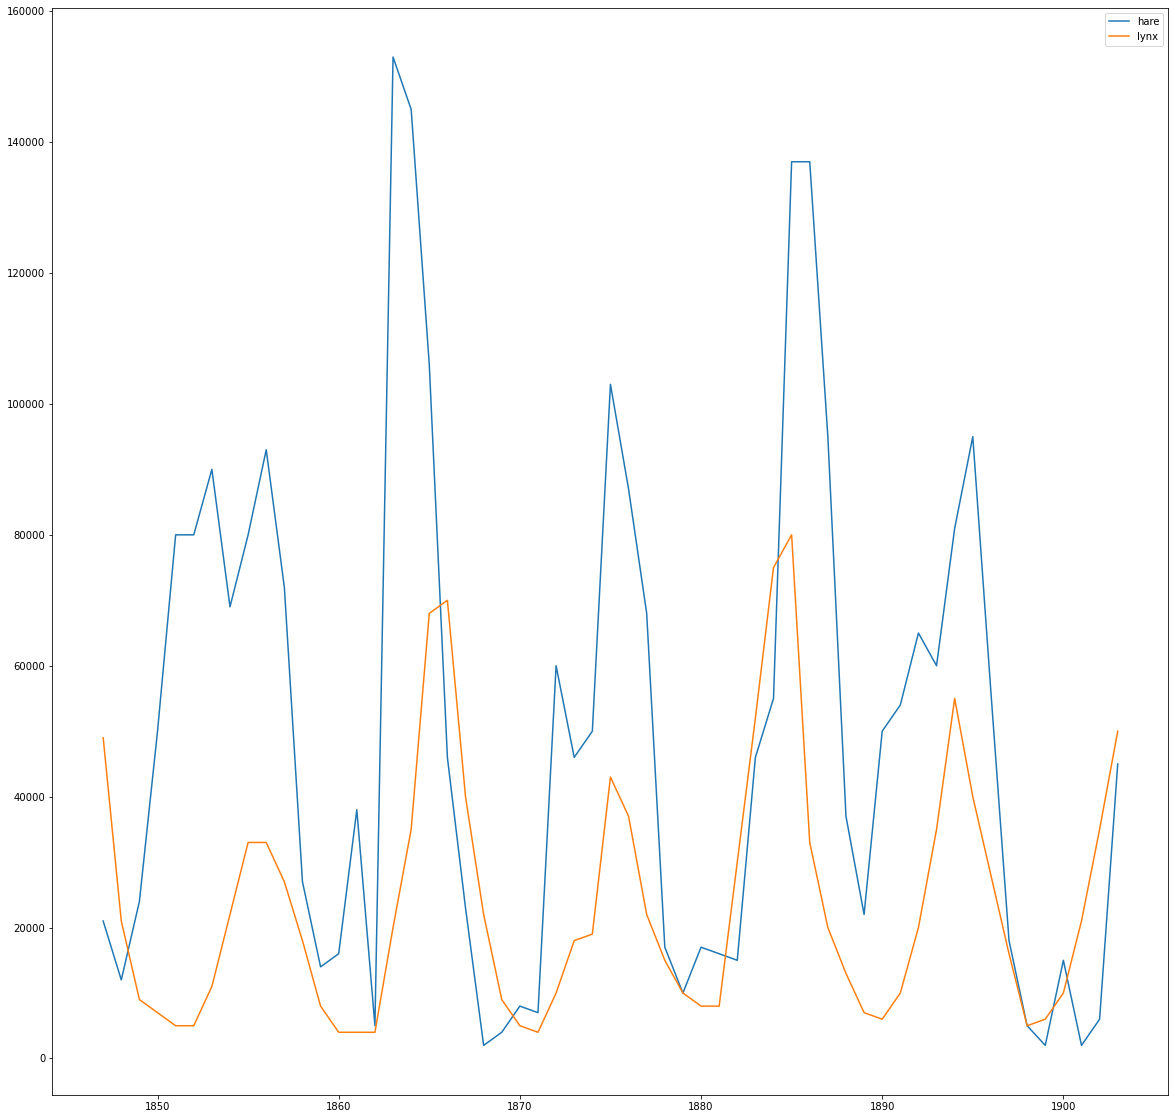

In [93]:
x = frame["year"]

plt.figure(figsize=(20, 20))

plt.plot(x, frame["hare"], label="hare")
plt.plot(x, frame["lynx"], label="lynx")
plt.legend()
plt.show()


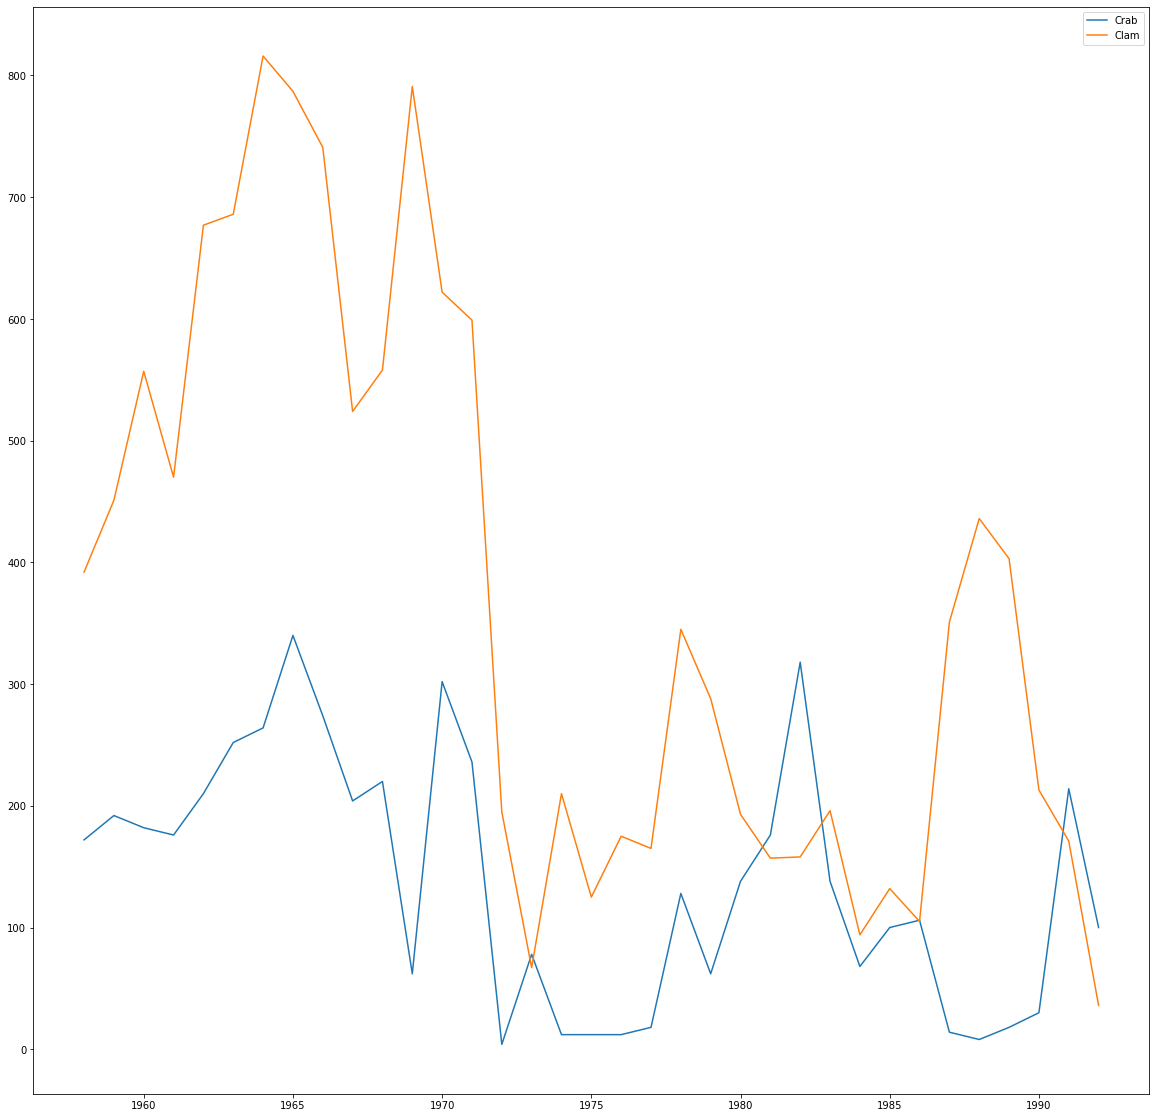

In [99]:
frame = pd.read_csv("/Users/nduginets/PycharmProjects/master-diploma/time series.csv")

# Year,Crab,Clam
x = frame["Year"]

plt.figure(figsize=(20, 20))

plt.plot(x, frame["Crab"] * 200, label="Crab")
plt.plot(x, frame["Clam"], label="Clam")
plt.legend()
plt.show()